##Data Aquisition and Loading

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Sales Data
sales_2017 = pd.read_excel('Sales 2017.xlsx')
sales_2018 = pd.read_excel('Sales 2018.xlsx')
sales_2019 = pd.read_excel('Sales 2019.xlsx')

In [4]:
#Combine Sales Data
df_sales = pd.concat([sales_2017, sales_2018, sales_2019], ignore_index=True)

In [41]:
#Load Dimension
df_customers = pd.read_excel('DimensionTables.xlsx', sheet_name='Customer')
df_products = pd.read_excel('DimensionTables.xlsx', sheet_name='Product')
df_product_groups = pd.read_excel('DimensionTables.xlsx', sheet_name='ProductGroup')
df_salespersons = pd.read_excel('DimensionTables.xlsx', sheet_name='SalesPerson')
df_dates = pd.read_excel('DimensionTables.xlsx', sheet_name='Dates')

##Data Understanding

In [42]:
# Display basic info for each dataframe
print("Sales Data Info:")
print(df_sales.info())
print("\nCustomers Data Info:")
print(df_customers.info())
print("\nProducts Data Info:")
print(df_products.info())
print("\nProduct Groups Data Info:")
print(df_product_groups.info())
print("\nSalespersons Data Info:")
print(df_salespersons.info())
print("\nDates Data Info:")
print(df_dates.info())
print("\nTargets Data Info:")
print(df_targets.info())

# Show first few rows of each
print("\nSales Data Sample:")
print(df_sales.head())
print("\nCustomers Data Sample:")
print(df_customers.head())
print("\nProducts Data Sample:")
print(df_products.head())
print("\nProduct Groups Data Sample:")
print(df_product_groups.head())
print("\nSalespersons Data Sample:")
print(df_salespersons.head())
print("\nDates Data Sample:")
print(df_dates.head())

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260096 entries, 0 to 260095
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   issue_date      260096 non-null  datetime64[ns]
 1   due_date        260096 non-null  datetime64[ns]
 2   invoice_number  260096 non-null  int64         
 3   customer_id     260096 non-null  int64         
 4   salesperson_id  260096 non-null  int64         
 5   product_id      260096 non-null  int64         
 6   quantity        260096 non-null  int64         
 7   unit_price      260096 non-null  float64       
 8   net_weight      260096 non-null  float64       
 9   sales_amount    260096 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(5)
memory usage: 19.8 MB
None

Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 6 columns):
 #   Column            Non-Null C

In [7]:
# Check unique identifiers for joins
print("Unique Customer IDs in Sales:", df_sales['Customer ID'].nunique())
print("Unique Customer IDs in Customers:", df_customers['Customer ID'].nunique())
print("Unique Product IDs in Sales:", df_sales['Product ID'].nunique())
print("Unique Product IDs in Products:", df_products['Product ID'].nunique())
print("Unique SalesPerson IDs in Sales:", df_sales['SalesPerson ID'].nunique())
print("Unique SalesPerson IDs in SalesPersons:", df_salespersons['SalesPerson ID'].nunique())

Unique Customer IDs in Sales: 1272
Unique Customer IDs in Customers: 1411
Unique Product IDs in Sales: 798
Unique Product IDs in Products: 2736
Unique SalesPerson IDs in Sales: 12
Unique SalesPerson IDs in SalesPersons: 12


In [8]:
# Check for missing values
print("\nMissing Values in Sales:")
print(df_sales.isnull().sum())


Missing Values in Sales:
Issue Date        0
Due Date          0
Invoice Number    0
Customer ID       0
SalesPerson ID    0
Product ID        0
Qty Itens         0
Unit Price        0
Net Weight        0
dtype: int64


In [10]:
# Summary statistics for sales
print("Sales Data Summary:")
print(df_sales.describe())

# Check data types and column names
print("\nSales Data Columns and Types:")
print(df_sales.dtypes)


Sales Data Summary:
                          Issue Date                       Due Date  \
count                         260096                         260096   
mean   2018-04-06 02:14:06.186023424  2018-05-06 00:04:34.717027584   
min              2017-01-12 00:00:00            2017-01-29 00:00:00   
25%              2017-10-12 00:00:00            2017-11-10 00:00:00   
50%              2018-05-12 00:00:00            2018-06-11 00:00:00   
75%              2018-10-02 00:00:00            2018-11-01 00:00:00   
max              2019-03-13 00:00:00            2019-04-25 00:00:00   
std                              NaN                            NaN   

       Invoice Number   Customer ID  SalesPerson ID     Product ID  \
count    2.600960e+05  2.600960e+05   260096.000000  260096.000000   
mean     1.886752e+06  3.340542e+06      218.155700    1276.259004   
min      1.491303e+06  6.156600e+05      102.000000     108.000000   
25%      1.712721e+06  2.870630e+06      144.000000     386.

##Data Cleaning & Preparation

In [44]:
# Standardize column names to lowercase with underscores
df_sales.columns = [col.lower().replace(' ', '_') for col in df_sales.columns]
df_customers.columns = [col.lower().replace(' ', '_') for col in df_customers.columns]
df_products.columns = [col.lower().replace(' ', '_') for col in df_products.columns]
df_product_groups.columns = [col.lower().replace(' ', '_') for col in df_product_groups.columns]
df_salespersons.columns = [col.lower().replace(' ', '_') for col in df_salespersons.columns]
df_dates.columns = [col.lower().replace(' ', '_') for col in df_dates.columns]

# Rename "qty_itens" to "quantity"
df_sales = df_sales.rename(columns={'qty_itens': 'quantity'})

#Verify column names
print('\nSale Info:')
print(df_sales.info())

print('\nCustomers Info:')
print(df_customers.info())

print('\nProducts Info:')
print(df_products.info())

print('\nProduct Groups Info:')
print(df_product_groups.info())

print('\nSalespersons Info:')
print(df_salespersons.info())

print('\nDates Info:')
print(df_dates.info())


Sale Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260096 entries, 0 to 260095
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   issue_date      260096 non-null  datetime64[ns]
 1   due_date        260096 non-null  datetime64[ns]
 2   invoice_number  260096 non-null  int64         
 3   customer_id     260096 non-null  int64         
 4   salesperson_id  260096 non-null  int64         
 5   product_id      260096 non-null  int64         
 6   quantity        260096 non-null  int64         
 7   unit_price      260096 non-null  float64       
 8   net_weight      260096 non-null  float64       
 9   sales_amount    260096 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(5)
memory usage: 19.8 MB
None

Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtyp

In [31]:
# Calculate 'sales_amount' = quantity * unit_price
df_sales['sales_amount'] = df_sales['quantity'] * df_sales['unit_price']

# Remove duplicates (based on invoice_number, product_id, quantity as composite key)
df_sales = df_sales.drop_duplicates(subset=['invoice_number', 'product_id', 'quantity'])

# Handle errors: Remove negative sales_amount or invalid dates
df_sales = df_sales[df_sales['sales_amount'] >= 0]
df_sales = df_sales[df_sales['issue_date'].notna()]

print("Cleaning Complete. New df_sales shape:", df_sales.shape)
print("Sample sales_amount:", df_sales['sales_amount'].head())

Cleaning Complete. New df_sales shape: (260096, 10)
Sample sales_amount: 0    52.98
1    26.64
2     9.60
3    17.52
4    16.86
Name: sales_amount, dtype: float64


In [35]:
# Merge with dimension tables (left join to preserve all sales records)
df_merged = df_sales.merge(df_customers, on='customer_id', how='left') \
                   .merge(df_products, on='product_id', how='left') \
                   .merge(df_product_groups, on='group_id', how='left') \
                   .merge(df_salespersons, on='salesperson_id', how='left') \
                   .merge(df_dates, left_on='issue_date', right_on='dates', how='left')

# Drop redundant 'dates' (now aliased as issue_date)
df_merged = df_merged.drop(columns=['dates'])

# Verify merge success
print("Merged DataFrame Columns (first 10):")
print(df_merged.columns.tolist()[:10])
print("\nMerged DataFrame Shape:", df_merged.shape)
print("\nSample Merged Data:")
print(df_merged[['issue_date', 'sales_amount', 'company_name', 'product', 'category', 'manager', 'salesperson_id']].head())

Merged DataFrame Columns (first 10):
['issue_date', 'due_date', 'invoice_number', 'customer_id', 'salesperson_id', 'product_id', 'quantity', 'unit_price', 'net_weight', 'sales_amount']

Merged DataFrame Shape: (260096, 29)

Sample Merged Data:
  issue_date  sales_amount  company_name       product category      manager  \
0 2017-01-12         52.98    Gnome ware  Product 1073     Food  Duane Frame   
1 2017-01-12         26.64    Gnome ware  Product 1420     Food  Duane Frame   
2 2017-01-12          9.60    Gnome ware   Product 264     Food  Duane Frame   
3 2017-01-13         17.52  Granite poly  Product 1154     Food  Duane Frame   
4 2017-01-13         16.86  Granite poly  Product 1527     Food  Duane Frame   

   salesperson_id  
0             265  
1             265  
2             265  
3             265  
4             265  


In [36]:
# Check for nulls post-merge
print("\nNull Values in Merged Data (top 10 columns):")
print(df_merged.isnull().sum().head(10))

# Recheck unique IDs post-merge
print("\nUnique Customer IDs in Merged:", df_merged['customer_id'].nunique())
print("Unique Product IDs in Merged:", df_merged['product_id'].nunique())
print("Unique SalesPerson IDs in Merged:", df_merged['salesperson_id'].nunique())
print("Unique Group IDs in Merged:", df_merged['group_id'].nunique())

# Test metrics
total_sales = df_merged['sales_amount'].sum()
print("\nTotal Sales:", total_sales)

# Sales by Year (post-merge)
print("\nSales by Year:")
print(df_merged.groupby('year')['sales_amount'].sum())

# Customer Coverage by State
print("\nCustomer Coverage by State:")
print(df_merged.groupby('state')['customer_id'].nunique().sort_values(ascending=False))

# Quality Flag: Check for unmatched records
unmatched_customers = df_merged[df_merged['company_name'].isna()]['customer_id'].nunique()
print("\nUnmatched Customers:", unmatched_customers)


Null Values in Merged Data (top 10 columns):
issue_date        0
due_date          0
invoice_number    0
customer_id       0
salesperson_id    0
product_id        0
quantity          0
unit_price        0
net_weight        0
sales_amount      0
dtype: int64

Unique Customer IDs in Merged: 1272
Unique Product IDs in Merged: 798
Unique SalesPerson IDs in Merged: 12
Unique Group IDs in Merged: 23

Total Sales: 17909232.490000002

Sales by Year:
year
2017     6648222.05
2018    10214809.43
2019     1046201.01
Name: sales_amount, dtype: float64

Customer Coverage by State:
state
WA    1272
Name: customer_id, dtype: int64

Unmatched Customers: 0


##Descriptive Statistics

In [47]:
# Summary statistics for key numeric columns
print("Descriptive Statistics:")
print(df_merged[['sales_amount', 'quantity', 'unit_price', 'net_weight']].describe())

# Correlation matrix
corr = df_merged[['sales_amount', 'quantity', 'unit_price', 'net_weight']].corr()
print("\nCorrelation Matrix:")
print(corr)

# Grouped summaries
print("\nSales by Year:")
print(df_merged.groupby('year')['sales_amount'].agg(['sum', 'mean', 'count']))

print("\nSales by Month:")
print(df_merged.groupby('month_name')['sales_amount'].agg(['sum', 'mean']))

print("\nTop 5 SalesPersons by Sales:")
print(df_merged.groupby('salesperson')['sales_amount'].sum().sort_values(ascending=False).head(5))

Descriptive Statistics:
        sales_amount       quantity     unit_price     net_weight
count  260096.000000  260096.000000  260096.000000  260096.000000
mean       68.856240      24.533911       6.793079       4.362966
std       286.864197      83.189664      14.541496      20.745448
min         0.720000       1.000000       0.030000       0.050000
25%        19.227500       6.000000       1.610000       0.990000
50%        34.080000      12.000000       2.920000       1.400000
75%        59.760000      24.000000       4.660000       3.520000
max     41040.000000    9000.000000     197.040000    3600.000000

Correlation Matrix:
              sales_amount  quantity  unit_price  net_weight
sales_amount      1.000000  0.674579    0.096548   -0.002693
quantity          0.674579  1.000000   -0.080850   -0.002572
unit_price        0.096548 -0.080850    1.000000   -0.007699
net_weight       -0.002693 -0.002572   -0.007699    1.000000

Sales by Year:
              sum       mean   count
yea

##Visualizations

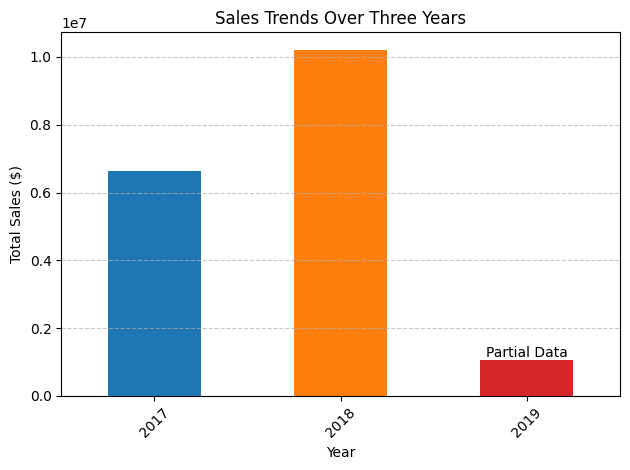

Sales by Year:
year
2017     6648222.05
2018    10214809.43
2019     1046201.01
Name: sales_amount, dtype: float64


In [60]:
# Group by year and calculate total sales
sales_by_year = df_merged.groupby('year')['sales_amount'].sum()

# Create bar chart
sales_by_year.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#d62728'],  # Distinct colors
                   title='Sales Trends Over Three Years')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)  # Readable labels
plt.xticks(range(len(sales_by_year.index)), sales_by_year.index, rotation=45)  # Set explicit year labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(2, sales_by_year[2019], 'Partial Data', ha='center', va='bottom')  # Annotate 2019

# Display chart
plt.tight_layout()
plt.show()

# Print values for verification
print("Sales by Year:")
print(sales_by_year)

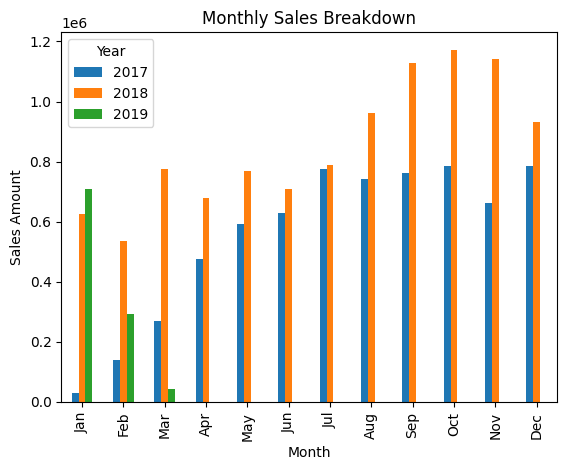

In [51]:
#Monthly Breakdowns for Seasonal Patterns
monthly_sales = df_merged.groupby(['year', 'month'])['sales_amount'].sum().unstack('year')
monthly_sales.plot(kind='bar', title='Monthly Sales Breakdown')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.show()

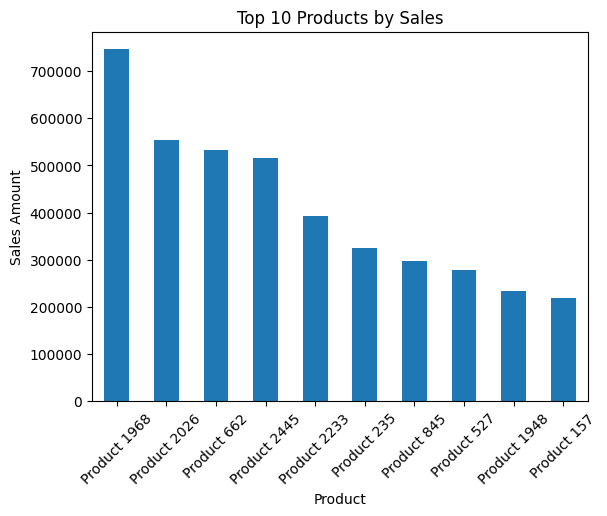

In [67]:
#Sales by Product(Top 10)
sales_by_product = df_merged.groupby('product')['sales_amount'].sum().sort_values(ascending=False).head(10)
sales_by_product.plot(kind='bar', title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

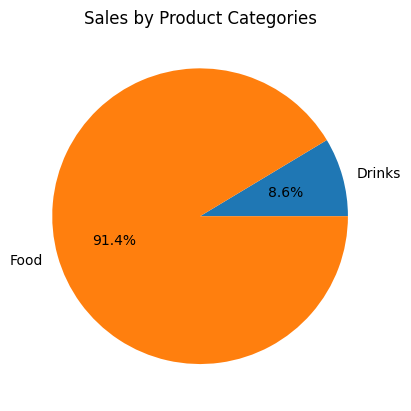

In [68]:
#Breakdown of Sales by Product Categories(Pie Chart)
sales_by_category = df_merged.groupby('category')['sales_amount'].sum()
sales_by_category.plot(kind='pie', autopct='%1.1f%%', title='Sales by Product Categories')
plt.ylabel('')
plt.show()

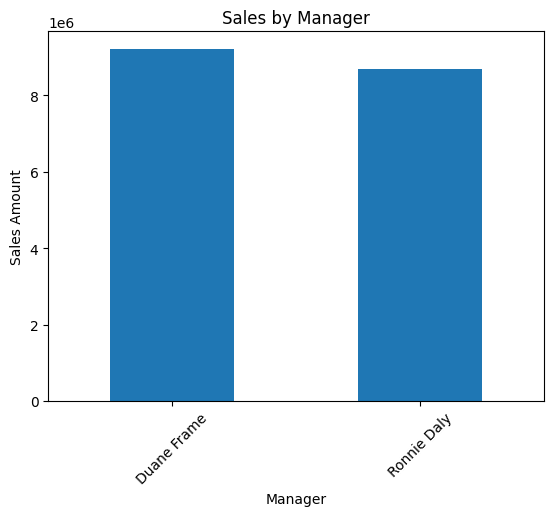

In [69]:
#Manager-wise Analysis
sales_by_manager = df_merged.groupby('manager')['sales_amount'].sum()
sales_by_manager.plot(kind='bar', title='Sales by Manager')
plt.xlabel('Manager')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

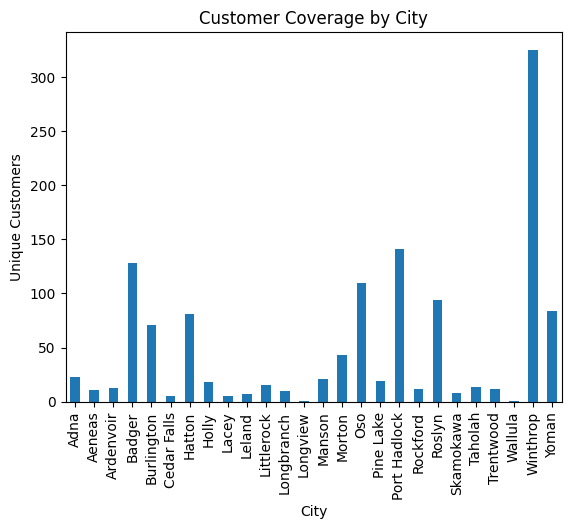

In [73]:
#Customer Coverage by City
customer_by_state = df_merged.groupby('city')['customer_id'].nunique()
customer_by_state.plot(kind='bar', title='Customer Coverage by City')
plt.xlabel('City')
plt.ylabel('Unique Customers')
plt.xticks(rotation=90)
plt.show()

##Creating File for Power BI

In [75]:
# Save the merged DataFrame to a CSV file
df_merged.to_csv('ABC_data.csv', index=False)